# Imports

In [40]:
import pandas as pd 
import numpy as np 

from sklearn.datasets import fetch_california_housing
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Data Load

In [2]:
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("MedHouseValue")], axis=1)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


# Assumptions

In [4]:
# Assumption of Linear regression

# 1. There exists a linear relationship b/w features and target variable
# 2. No or low multicollinearity between features
# 3. Homoscedasity: the variance of residuals(errors) should be same for all levels of independent variable
#         - the spread of error( predicted - actual) should be the same whether the predicted value is small or large
# 4. Normality of errors
#     - the errors should follow a bell curve
#     - for valid hypothesis testing
#     - Not mandatory but better inferences if true
# 5. Independence of errors
#     - observations are independent and residuals are not correlated'
#     - can do Durbin-Watson test for correlation of residuals
#         - 2 = No autocorrelation
#         - < 1.5 = positive correlation
#         - > 2.5 = negative correlation


In [20]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['vif_factor'] = [variance_inflation_factor(df,i) for i in range(df.shape[1])]

In [21]:
vif_data

,feature,vif_factor
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,MedHouseValue,9.285659


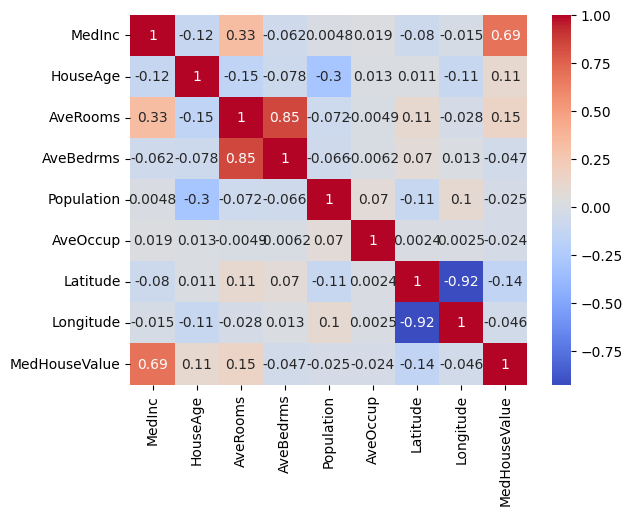

In [22]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df['Rooms'] = PCA(n_components=1).fit_transform(df[['AveRooms', 'AveBedrms']])
df['Location'] = PCA(n_components=1).fit_transform(df[['Latitude', 'Longitude']])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    df[[col for col in df.columns if col not in ('MedHouseValue', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude')]],
    df['MedHouseValue'],
    test_size=0.33,
    random_state=42
)

# OLS

In [29]:
import statsmodels.api as sm

In [30]:
x = sm.add_constant(x_train)
y = y_train

model = sm.OLS(y, x).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MedHouseValue   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2447.
Date:                Sat, 19 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:32:18   Log-Likelihood:                -16593.
No. Observations:               13828   AIC:                         3.320e+04
Df Residuals:                   13821   BIC:                         3.325e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1706      0.027     -6.274      0.000      -0.224      -0.117
MedInc         0.4399      0.004    115.803      0.000       0.432       0.447
HouseAge       0.0177      0.001     30.623      0.000       0.017       0.019
Population    2.7e-05   6.33e-06      4.268      0.000    1.46e-05    3.94e-05
AveOccup      -0.0041      0.001     -7.479      0.000      -0.005      -0.003
Rooms         -0.0215      0.003     -7.272      0.000      -0.027      -0.016
Location      -0.0132      0.002     -5.499      0.000      -0.018      -0.008
==============================================================================
Omnibus:                     3074.775   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8282.171
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.950   Cond. No.                     7.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
x_test = sm.add_constant(x_test)
y_pred = model.predict(x_test)

In [36]:
print(f'r2_score = {r2_score(y_pred=y_pred, y_true=y_test)}\n mae = {mean_absolute_error(y_pred=y_pred, y_true=y_test)}\n mape = {mean_absolute_percentage_error(y_pred=y_pred, y_true=y_test)}')

r2_score = 0.5158692405647838
 mae = 0.5978769896621448
 mape = 0.37162471250494794


# Linear regression

In [37]:
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("MedHouseValue")], axis=1)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    df[[col for col in df.columns if col not in ('MedHouseValue')]],
    df['MedHouseValue'],
    test_size=0.33,
    random_state=42
)

In [41]:
model_lasso = Lasso()
model_ridge = Ridge()

model_lasso.fit(x_train, y_train)
model_ridge.fit(x_train, y_train)

y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

In [42]:
print(f'r2_score = {r2_score(y_pred=y_pred_lasso, y_true=y_test)}\n mae = {mean_absolute_error(y_pred=y_pred_lasso, y_true=y_test)}\n mape = {mean_absolute_percentage_error(y_pred=y_pred_lasso, y_true=y_test)}')

r2_score = 0.28450867788418377
 mae = 0.7678314827397038
 mape = 0.5234851892181361


In [43]:
print(f'r2_score = {r2_score(y_pred=y_pred_ridge, y_true=y_test)}\n mae = {mean_absolute_error(y_pred=y_pred_ridge, y_true=y_test)}\n mape = {mean_absolute_percentage_error(y_pred=y_pred_ridge, y_true=y_test)}')

r2_score = 0.5970944804683738
 mae = 0.5295798638434877
 mape = 0.3178688442238564


In [46]:
pd.DataFrame({'Col': x_train.columns, 'coef_lasso': model_lasso.coef_, 'coef_ridge': model_ridge.coef_})

,Col,coef_lasso,coef_ridge
0,MedInc,0.145700,4.446810e-01
1,HouseAge,0.005806,9.552146e-03
2,AveRooms,0.000000,-1.216311e-01
3,AveBedrms,-0.000000,7.771310e-01
4,Population,-0.000006,-7.191911e-08
5,AveOccup,-0.000000,-3.298916e-03
6,Latitude,-0.000000,-4.191216e-01
7,Longitude,-0.000000,-4.340684e-01
